# Comparative Analysis
In this notebook, we compare ClaP with competitors.

In [27]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [28]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from aeon.benchmarking import plot_critical_difference
from external.MCM import MCM
from wand.image import Image

sns.set_theme()
sns.set_color_codes()

import os
import sys

sys.path.append("../../")

Let's choose a score for evaluation (AMI).

In [29]:
eval_score = "ami_score"

Let's load the scores from the different methods.

In [30]:
c1 = ["KShape", "GAK", "Time2Feat", "Agglomerative", "Spectral"]
c2 = ["AutoPlait", "CLaP", "GGS", "HDP-HSMM", "TICC", "Time2State"]

datasets = ["HAS"] #    
methods, dfs = list(), list()

for candidate_name in c1:
    methods.append((candidate_name, "clustering", f"{candidate_name}.csv.gz"))
    
for candidate_name in c2:
    methods.append((candidate_name, "state_detection", f"{candidate_name}.csv.gz"))

for idx, (name, comp_type, file_name) in enumerate(methods):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/{comp_type}/{d}_{file_name}", compression="gzip")) # usecols=["dataset", eval_score],
    
    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    
    try:
        df_scores[name] = df[eval_score]
    except:
        df_scores[name] = df["ami"]

df_scores.reset_index(drop=True, inplace=True)
df_scores

,dataset,KShape,GAK,Time2Feat,Agglomerative,Spectral,AutoPlait,CLaP,GGS,HDP-HSMM,TICC,Time2State
0,indoor_subject1_routine1 (id125),0.510,0.193,0.758,0.538,0.502,0.000,0.666,0.544,0.762,0.021,0.728
1,indoor_subject1_routine1 (id140),0.402,0.483,0.864,0.754,0.522,0.000,0.559,0.644,0.623,0.013,0.750
2,indoor_subject1_routine1 (id150),0.003,0.056,0.643,0.659,0.141,0.000,0.807,0.729,0.643,0.045,0.784
3,indoor_subject1_routine1 (id221),0.089,0.014,0.493,0.476,0.190,0.000,0.000,0.380,0.721,0.492,0.705
4,indoor_subject1_routine1 (id52),0.036,0.039,0.706,0.680,0.309,0.000,0.419,0.000,0.867,0.723,0.673
5,indoor_subject1_routine1 (id93),0.000,0.243,0.783,0.789,0.453,0.000,0.626,0.537,0.765,0.026,0.720
6,indoor_subject1_routine2 (id127),0.059,0.053,0.103,0.196,0.114,0.000,0.000,0.000,0.413,0.000,0.559
7,indoor_subject1_routine2 (id177),0.010,0.000,0.025,0.042,0.349,0.151,0.000,0.000,0.328,0.192,0.334
8,indoor_subject1_routine2 (id27),0.045,0.060,0.183,0.201,0.046,0.000,0.000,0.551,0.381,0.012,0.460
9,indoor_subject1_routine2 (id65),0.047,0.033,0.232,0.175,0.060,0.447,0.596,0.000,0.355,0.014,0.439


Let's calculate the mean/median/std score.

In [31]:
df_scores.iloc[:,1:].mean(axis=0).sort_values(ascending=False).round(3)

CLaP             0.596
Agglomerative    0.556
HDP-HSMM         0.497
Time2Feat        0.471
Time2State       0.429
GGS              0.413
Spectral         0.399
AutoPlait        0.194
TICC             0.193
GAK              0.188
KShape           0.181
dtype: float64

In [32]:
df_scores.iloc[:,1:].median(axis=0).sort_values(ascending=False).round(3)

CLaP             0.692
Agglomerative    0.558
HDP-HSMM         0.526
Time2State       0.483
Time2Feat        0.461
GGS              0.430
Spectral         0.320
GAK              0.049
KShape           0.038
TICC             0.024
AutoPlait        0.000
dtype: float64

In [33]:
df_scores.iloc[:,1:].std(axis=0).sort_values().round(3)

HDP-HSMM         0.254
Agglomerative    0.299
Time2State       0.314
GAK              0.320
KShape           0.325
Spectral         0.331
CLaP             0.334
TICC             0.345
AutoPlait        0.350
GGS              0.353
Time2Feat        0.356
dtype: float64

Let's compute the wins per method.

In [34]:
ranks = df_scores.iloc[:,1:].rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [35]:
for mean, name in zip(means[args], df_scores.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

CLaP:wins=115 rank=3.0
Agglomerative:wins=51 rank=3.6
HDP-HSMM:wins=38 rank=4.0
Time2Feat:wins=51 rank=4.3
Time2State:wins=31 rank=4.5
Spectral:wins=50 rank=5.0
GGS:wins=43 rank=5.0
TICC:wins=33 rank=6.9
GAK:wins=31 rank=7.1
KShape:wins=32 rank=7.1
AutoPlait:wins=36 rank=7.4


Let's plot the CD diagram.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_3451/1137986766.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")
/Users/ermshaua/miniconda3/envs/clap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


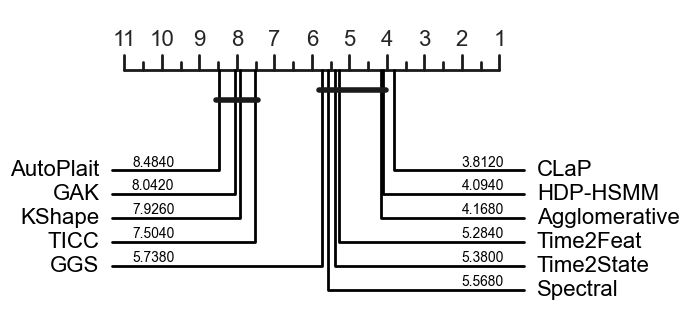

In [36]:
ax = plot_critical_difference(
    scores=df_scores.iloc[:, 1:].to_numpy(),
    labels=df_scores.columns[1:].to_numpy(),
    errors=False,
    clique_method="holm",
    alpha=0.05,
)

plt.savefig("../../figures/cd_clustering_comparative_combined.pdf", bbox_inches="tight")

Let's plot the MCM.

Processing Time2State, TICC:   0%|          | 0/11 [00:00<?, ?it/s]         


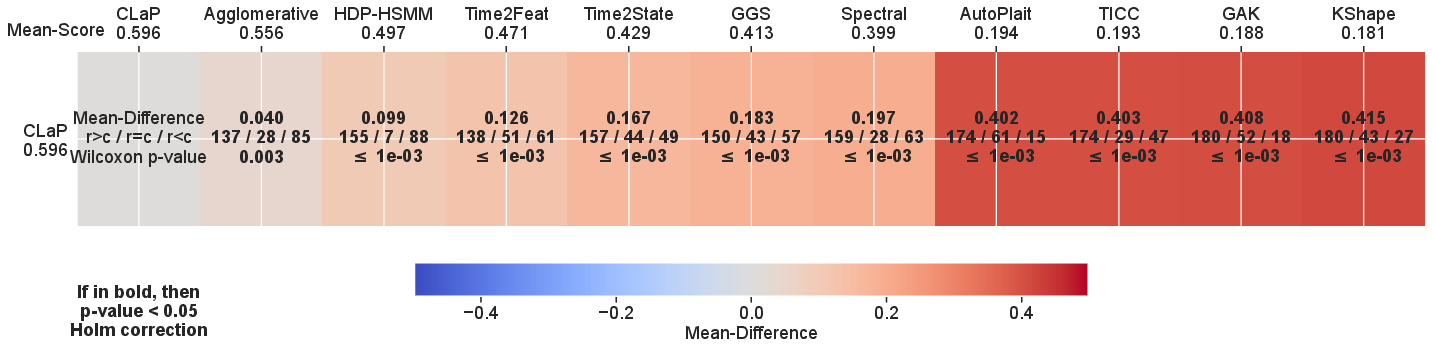

In [37]:
dir_path = "../../figures/"
file_name = "mcm_clustering_comparative_combined"

MCM.compare(
    output_dir=dir_path,
    used_statistic="Score",
    save_as_json=False,
    df_results=df_scores.iloc[:, 1:],
    pdf_savename=file_name,
    load_analysis=False,
    pvalue_correction="Holm",
    row_comparates=("CLaP",),
    fig_size=(20,5),
    font_size=18,
    precision=3
)
Image(filename=os.path.join(dir_path, file_name + ".pdf"))

Let's compute wins/losses against ClaSP.

In [38]:
selection = "CLaP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

CLaP vs KShape: (wins/ties/losses): 180/43/27
CLaP vs GAK: (wins/ties/losses): 180/52/18
CLaP vs Time2Feat: (wins/ties/losses): 138/51/61
CLaP vs Agglomerative: (wins/ties/losses): 137/28/85
CLaP vs Spectral: (wins/ties/losses): 159/28/63
CLaP vs AutoPlait: (wins/ties/losses): 174/61/15
CLaP vs GGS: (wins/ties/losses): 150/43/57
CLaP vs HDP-HSMM: (wins/ties/losses): 155/7/88
CLaP vs TICC: (wins/ties/losses): 174/29/47
CLaP vs Time2State: (wins/ties/losses): 157/44/49


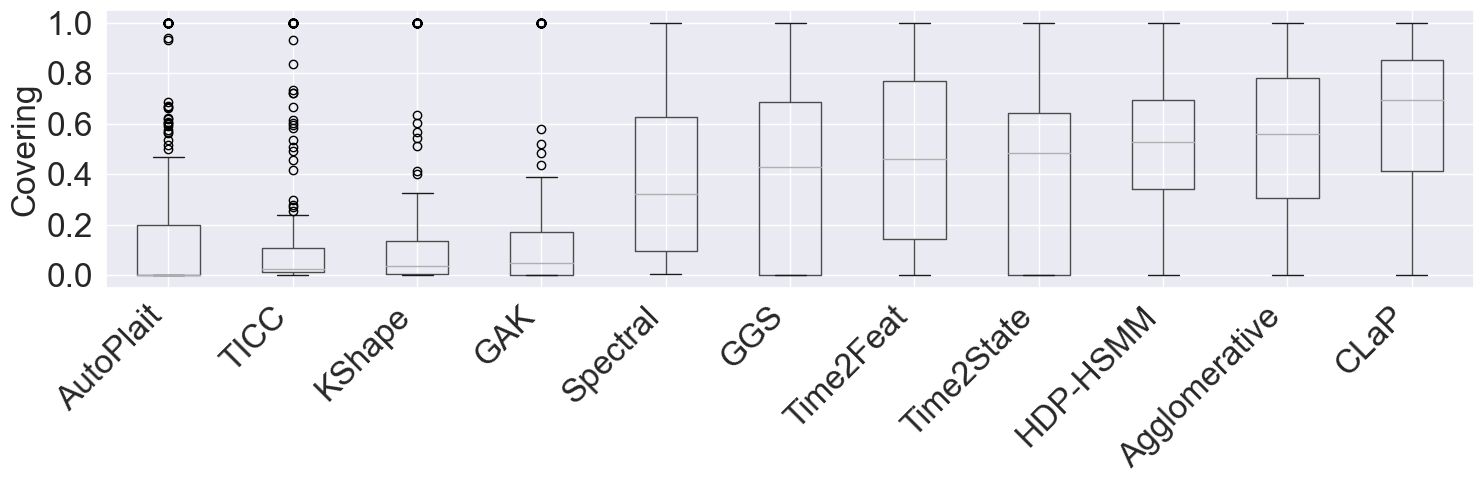

In [39]:
fontsize = 24
_, ax = plt.subplots(figsize=(15, 5))

# sort by median performance
df_sorted_scores = df_scores[df_scores.iloc[:, 1:].median(axis=0).sort_values().index]

df_sorted_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xticklabels(df_sorted_scores.columns, rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_clustering_comparative_combined.pdf", bbox_inches="tight")